# Gauged Q-ball

In [1]:
import numpy as np
import scipy as sp
from scipy.integrate import solve_ivp
from scipy.integrate import ode
from scipy.optimize import minimize
import sympy as sy
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from scipy.integrate import quad
from numpy import loadtxt
from pylab import figure, plot, xlabel, grid, legend, title, savefig
from matplotlib.font_manager import FontProperties
from scipy.integrate import cumulative_trapezoid
from IPython.display import display
from pylab import *

In [2]:
def vectorfield(r, funs):
    """
    Defines the differential equations for the coupled system.

    Arguments:
        w :  vector of the state variables:
                  w = [α,x,g,y]
        r :  time
        p :  vector of the parameters:
                  p = [l, w, m, K]
    """
    α, x, g, y = funs
    l, w, M  = p

    # Create f = (x1',y1',x2',y2'):
#    f = [x,
         #-x*(2*r/(r**2+1e-12))+((1-l*(g**2)*np.sin(α)**2))/((1-l*(g**2)*np.sin(α)**2)**2+1e-12)*(2*x*y*l*g*np.sin(α)**2-(1/2)*(g**2)*(np.sin(2*α)**2)*(1-l*x**2)+(4*(M**2))*np.sin(α)),
         #y,
         #-y*(2*r/(r**2+1e-12))+ (0.13468/l)*g*np.sin(α)**2*(1+l*x**2)]
    f = [x,
         -x*(2*r/(r**2))+((1-l*(g**2)*np.sin(α)**2))/((1-l*(g**2)*np.sin(α)**2)**2)*(2*x*y*l*g*np.sin(α)**2-(1/2)*(g**2)*(np.sin(2*α)**2)*(1-l*x**2)+(4*(M**2))*np.sin(α)),
         y,
         -y*(2*r/(r**2+1e-12))+ (0.13468/l)*g*np.sin(α)**2*(1+l*x**2)]       
    return f

$\alpha' = x \\
x' = -\frac{2}{r}x+ \frac{1}{(1-\lambda g^{2} \sin^{2} \alpha)} \left[ 2\lambda g x y \sin^{2}\alpha  -\frac{g^{2}}{2}\sin 2\alpha (1-\lambda x^{2}) +4 m^{2} \sin \alpha \right]\\
g'=y\\
y'= -\frac{2}{r}y+ 4K g \sin^{2}\alpha (1+\lambda x^{2}) $

In [3]:
#constants
l = 1
w = 0.5
M = 1.6

# Initial conditions
α = 5
x = 0
g = 0.3
y = 0

# ODE solver parameters
abserr = 1.0e-8
relerr = 1.0e-6
stoptime = 10.0
numpoints = 250



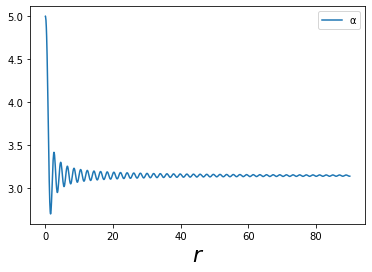

In [4]:

#r = np.linspace(0.0, 9, 100)

# Pack up the parameters and initial conditions:
p = [l, w, M]
w0 = α, x, g, y

# Call the ODE solver.
#wsol, inf0 = odeint(vectorfield, w0, r, args=(p,), full_output = 1, atol=abserr, rtol=relerr,)
#wsol=ode(vectorfield,).set_integrator('vode',nsteps=100,method='bdf')
#wsol.set_initial_value(w0, r= 0)

#sol = solve_ivp(vectorfield, t_span=(0.0,max(r)), y0=w0, method='BDF', t_eval = r, rtol=1e-7,atol=1e-7)
t0, tf = 0.000000000001, 90 
soln = solve_ivp(vectorfield, (t0, tf), y0=w0, method='BDF')    
    
#st=ode(vectorfield,jac=None).set_integrator('vode',method='bdf')    
#st.set_f_params(p)
#st.set_initial_value(w0)    
#y1_sol = wsol.T[0]
#y2_sol = wsol.T[2]

plt.plot(soln.t, soln.y[0], label = 'α')
#plt.plot(r, y2_sol, label = 'g')
#plt.xlim([.0, 0.3])
#plt.ylim([-0, 2.0])
plt.xlabel('$r$', fontsize=22)
plt.legend(loc='best')
plt.show()

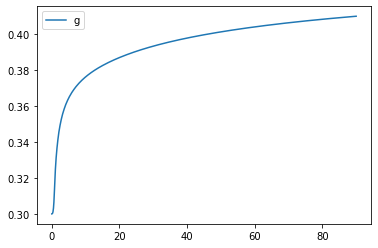

In [5]:
#y3_sol = wsol.T[1]
#y4_sol = wsol.T[3]

#plt.plot(r, y3_sol, label = 'α')
plt.plot(soln.t, soln.y[2], label = 'g')
#plt.xlim([.0, 5])
#plt.xlabel('$r$', fontsize=22)
plt.legend()
plt.show()

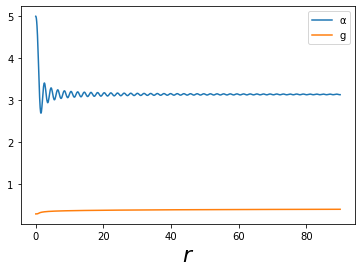

In [6]:
plt.plot(soln.t, soln.y[0], label = 'α')
plt.plot(soln.t, soln.y[2], label = 'g')
#plt.xlim([.0, 0.001])
#plt.ylim([-0.001, .0020])
plt.xlabel('$r$', fontsize=22)
plt.legend(loc='best')
plt.show()

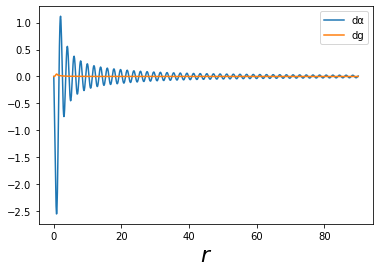

In [8]:
plt.plot(soln.t, soln.y[1], label = 'dα')
plt.plot(soln.t, soln.y[3], label = 'dg')
#plt.xlim([.0, 0.001])
#plt.ylim([0.5, -.150])
plt.xlabel('$r$', fontsize=22)
plt.legend(loc='best')
plt.show()

## Energy 

$E_{g}= 4\pi K \int dr \, r^{2}   \left[  g^{2} \sin^{2} \alpha \left( 1+  \lambda \left(\alpha'\right)^{2} \right) +  \left(\alpha'\right)^{2} - 8m^{2}\left(\cos \alpha-1 \right) + \frac{1}{4K} \left(g'\right)^{2} \right]$

In [9]:
α  = soln.y[0] 
dα = soln.y[1] 
g  = soln.y[2]
dg = soln.y[3]

Text(0.5, 0, '$r$')

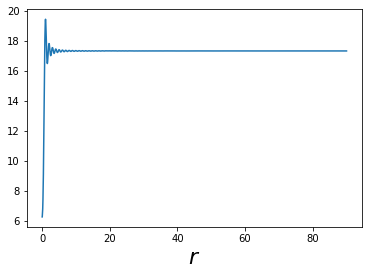

In [10]:
e = (0.4231/l)*((g**2)*(np.sin(α)**2)*(1+l*dα**2)+dα**2 - 8*(M**2)*(np.cos(α)-1)+7.425*l*(dg)**2  )
plt.plot(soln.t, e)
plt.xlabel('$r$', fontsize=22)

Text(0.5, 0, '$r$')

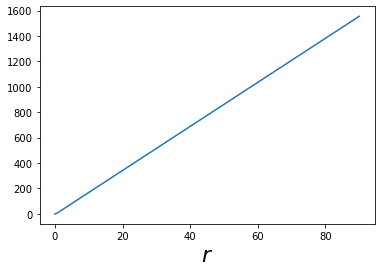

In [11]:
Eg =  e
Int=cumulative_trapezoid(Eg,soln.t, initial=0)
plt.plot(soln.t, Int)
plt.xlabel('$r$', fontsize=22)

## Charge

$\mathcal{Q}_{g}= 8 \pi K \int dr\, r^{2} \, g\sin^{2}\alpha \left(1+\lambda (\alpha')^{2}\right)  
$

In [12]:
qg = 2*(0.4231/l)*g*(np.sin(α)**2)*(1+l*dα**2)

Text(0.5, 0, '$r$')

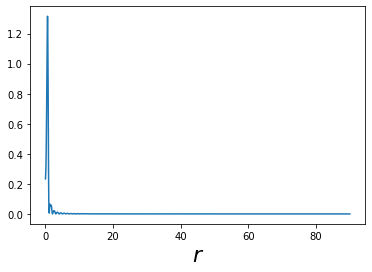

In [13]:
plt.plot(soln.t, qg)
plt.xlabel('$r$', fontsize=22)